In [1]:
# 描述性统计分析
import pandas as pd

# 读取数据文件
credit = pd.read_csv('credit_card.csv', encoding='GBK')
# 删除信用卡顾客编号属性
credit = credit.drop('信用卡顾客编号', axis=1)
length = len(credit)  # 计算数据量
# 定义描述性统计函数,且将结果保留3位小数
def status(x): 
    return pd.Series([x.count(), length - x.count(), len(credit.groupby(by=x)), x.max() - x.min(),
                      x.quantile(.75) - x.quantile(.25), x.mode()[0], format(x.var(), '.3f'), 
                      format(x.skew(), '.3f'), format(x.kurt(), '.3f')], index=['非空值数', '缺失值数',
                    '类别数', '极差', '四分位差', '众数', '方差', '偏度', '峰度'])

# 应用描述性统计函数
describe_tb = credit.apply(status)
print(describe_tb)

       申请书来源     瑕疵户      逾期      呆账    借款余额      退票    拒往记录  强制停卡记录     张数  \
非空值数   65535   65535   65535   65535   65535   65535   65535   65535  65535   
缺失值数       0       0       0       0       0       0       0       0      0   
类别数        8       2       2       2       2       2       2       2      4   
极差         7       1       1       1       1       1       1       1      3   
四分位差       3       0       0       0       0       0       0       0      1   
众数         2       2       2       2       2       2       2       2      2   
方差     4.166   0.052   0.079   0.074   0.085   0.080   0.080   0.084  0.568   
偏度     0.303  -3.912  -2.946  -3.085  -2.799  -2.922  -2.925  -2.819  0.985   
峰度    -0.949  13.304   6.680   7.519   5.833   6.538   6.553   5.945  0.928   

          频率   ...        职业   个人月收入  个人月开销      住家   家庭月收入    月刷卡额    宗教信仰  \
非空值数   65535   ...     65535   65535  65535   65535   65535   65535   65535   
缺失值数       0   ...         0       0      0       0

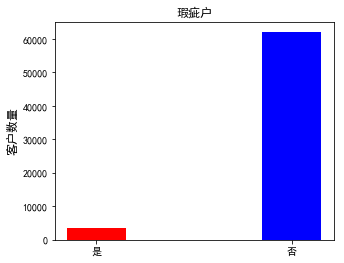

In [3]:
import matplotlib.pyplot as plt
from collections import OrderedDict  #collections模块为我们提供了OrderdDict,获取一个有序的字典对象
plt.rcParams['font.family'] = 'SimHei'  # 正常显示中文

plt.figure(figsize=(5, 4))  # 设置画布大小
plt.bar(['是'], credit['瑕疵户'].value_counts()[1], color='r', width=0.3)#value_counts()函数得作用 用来统计数据表中,指定列里有多少个不同的数据值,并计算每个不同值有在该列中的个数,同时还能根据指定得参数返回排序后结果
plt.bar(['否'], credit['瑕疵户'].value_counts()[2], color='b', width=0.3)#柱状图
plt.ylabel('客户数量', fontsize=12)  # 设置y轴坐标和字体大小
plt.title('瑕疵户', fontsize=12)  # 设置标题和字体大小
plt.show()

In [4]:

# 编写瑕疵户与信用记录之间的关系函数
def credit_plot(column, i):
    ax = plt.subplot(3, 2, i)  # 子画布
    is_data = credit[credit['瑕疵户'] == 1][column]  # 瑕疵户数据
    not_data = credit[credit['瑕疵户'] == 2][column]  # 非瑕疵户数据
    is_y = is_data.value_counts() / is_data.shape[0]  # y数据
    print(is_y)
    print(len(is_y))
    ax.bar(1, is_y[1], color='r', label='是', width=0.3)  # 绘制柱状图
    if len(is_y) == 2:
        ax.bar(1, is_y[2], bottom=is_y[1], color='b', width=0.3)  # 柱堆叠
    not_y = not_data.value_counts() / not_data.shape[0]  # y数据
    ax.bar(2, not_y[1], color='r', width=0.3)  # 绘制柱形图
    ax.bar(2, not_y[2], bottom=not_y[1], color='b', label='否', width=0.3)  # 绘制柱形图
    ax.set_xticks([1, 2])  # 设置x轴坐标
    ax.set_xticklabels(['是', '否'], fontsize=14)  # 设置x轴坐标标签
    plt.ylabel('占比', fontsize=14)  # 设置y标题
    plt.title(column, fontsize=14)  # 设置标题
    plt.tight_layout(1.5)  # 调整子图间距

1    0.909521
2    0.090479
Name: 逾期, dtype: float64
2
1    0.838252
2    0.161748
Name: 呆账, dtype: float64
2
1    1.0
Name: 强制停卡记录, dtype: float64
1
1    0.911192
2    0.088808
Name: 退票, dtype: float64
2
1    0.837973
2    0.162027
Name: 拒往记录, dtype: float64
2


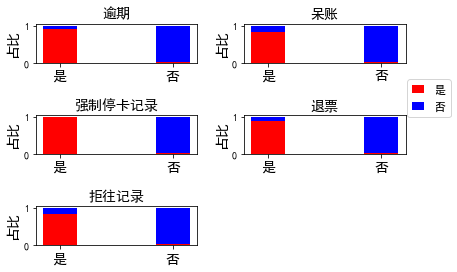

In [6]:
# 绘制瑕疵户与信用记录关系图
credit_plot('逾期', 1)
credit_plot('呆账', 2)
credit_plot('强制停卡记录', 3)
credit_plot('退票', 4)
credit_plot('拒往记录', 5)
plt.legend(loc=[2.3, 3.3], fontsize=12, handlelength=1)  # 添加图例
plt.show()


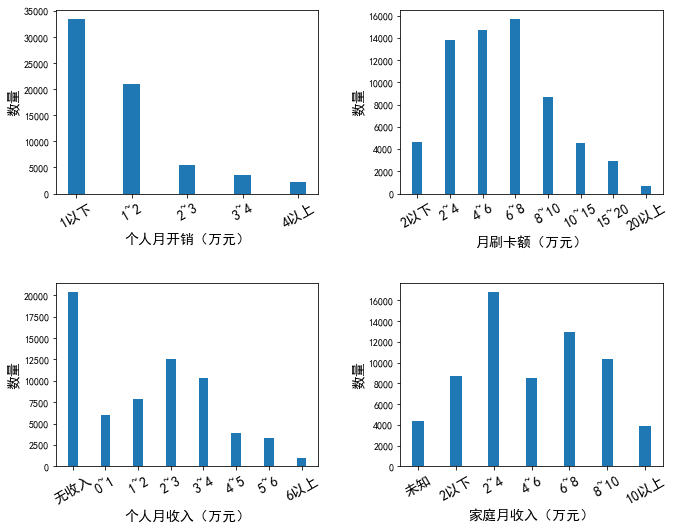

In [5]:
# 定义绘制客户经济情况分析直方图的函数
def economic_plot(column, tick, a): 
    ax = plt.subplot(2, 2, a)  # 子图
    situ = sorted(credit[column].unique())  # 排序
    x = [i for i in range(len(situ))]  # x轴坐标数据
    y = [credit[column].value_counts()[i] for i in situ]  # y轴数据
    ax.bar(x, y, width=0.3)  # 绘制柱状图
    plt.ylabel('数量', fontsize=14)  # y轴坐标轴标题
    plt.xticks(rotation=30)  # x轴坐标轴标签倾斜程度
    ax.set_xticks([i for i in range(len(x))])  # 重设x轴坐标数据   
    ax.set_xticklabels(tick, fontsize=14)  # 设置x轴显示坐标数据
    ax.set_xlabel(column+'（万元）', fontsize=14)  # y轴坐标轴标题
    plt.tight_layout(3)  # 控制子图之间的距离
plt.figure(figsize=(10, 8))
#ax.set_xticks()设置刻度 ，matplotlib将刻度放在对应范围的哪个位置，默认情况下这些刻度就是刻度标签；

#ax.set_xticklabels()，可以将任何其他类型的值作为标签.可以赋值给之前已经设置过的set_xtick.

#ax.set_xticks([0,1,2,3,4]) # 将0,1,2,3,4作为x轴刻度标签

# 设置x轴坐标
tick1 = ['1以下', '1~2', '2~3', '3~4', '4以上']  # 个人月开销
tick2 = ['2以下', '2~4', '4~6', '6~8', '8~10', '10~15', '15~20', '20以上']  # 月刷卡额
tick3 = ['无收入', '0~1', '1~2', '2~3', '3~4', '4~5', '5~6', '6以上']  # 个人月收入
tick4 = ['未知', '2以下', '2~4', '4~6', '6~8', '8~10', '10以上']  # 家庭月收入
economic_plot('个人月开销', tick1, 1)
economic_plot('月刷卡额', tick2, 2)
economic_plot('个人月收入', tick3, 3)
economic_plot('家庭月收入', tick4, 4)
plt.show()


In [8]:
import colorsys
import random

def get_n_hls_colors(num):
    hls_colors = []
    i = 0
    step = 360.0 / num
    while i < 360:
        h = i
        s = 90 + random.random() * 10
        l = 50 + random.random() * 10
        _hlsc = [h / 360.0, l / 100.0, s / 100.0]
        hls_colors.append(_hlsc)
        i += step
    return hls_colors
 
def ncolors(num):
    rgb_colors = []
    if num < 1:
        return rgb_colors
    hls_colors = get_n_hls_colors(num)
    for hlsc in hls_colors:
        _r, _g, _b = colorsys.hls_to_rgb(hlsc[0], hlsc[1], hlsc[2])
        r, g, b = [int(x * 255.0) for x in (_r, _g, _b)]
        rgb_colors.append([r, g, b])
    return rgb_colors

def color(value):
    digit = list(map(str, range(10))) + list("ABCDEF")# 16进制 0到F
    if isinstance(value, tuple):
        string = '#'
        for i in value:
            a1 = i // 16
            a2 = i % 16
            string += digit[a1] + digit[a2]
        return string
    elif isinstance(value, str):
        a1 = digit.index(value[1]) * 16 + digit.index(value[2])
        a2 = digit.index(value[3]) * 16 + digit.index(value[4])
        a3 = digit.index(value[5]) * 16 + digit.index(value[6])
        return (a1, a2, a3)




[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 3, 4]
[2, 4]
[5]
[6]
[0]
[0]


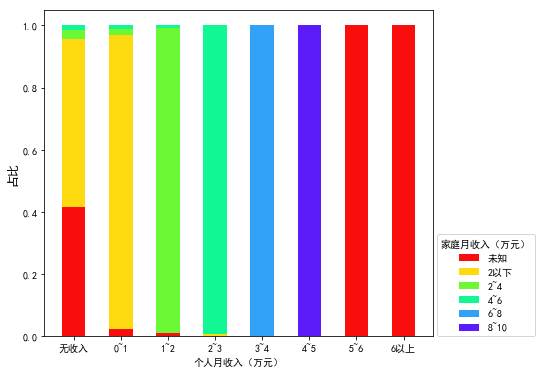

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7]
[1, 3, 4, 5, 6]


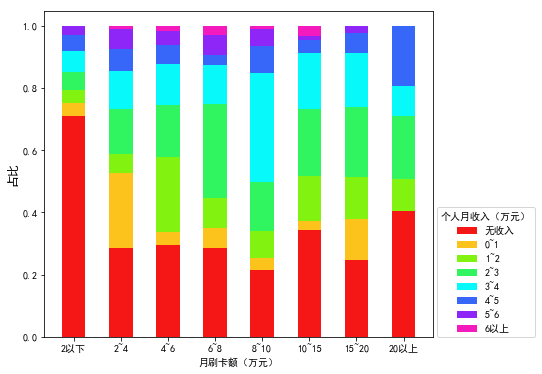

[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[2, 3, 4, 5, 6]


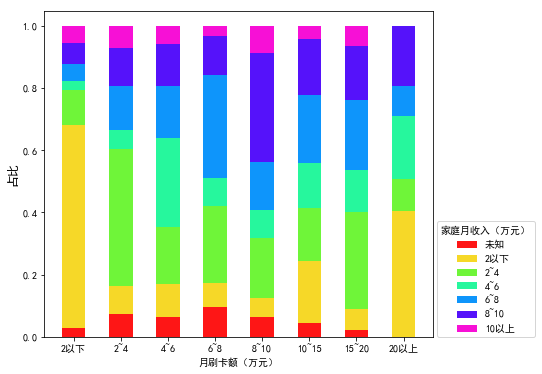

In [9]:
# 编写个人月收入，家庭月收入与月刷卡额之间的关系函数
def risk_plot(column1, column2, xlabel_list=[], ylabel_list=[]):
    fig, ax = plt.subplots(figsize=(8, 6))  # 画布大小
    x_data = credit[column1]  # x轴数据
    co = list(map(lambda x:color(tuple(x)), ncolors(len(ylabel_list))))  # 指定数量的颜色

# 循环绘制柱状堆叠图
    for i in sorted(x_data.unique()):
        y_data = credit[x_data == i][column2]
        part = sorted(y_data.unique())
        print(part)
        exp = 0
        if part[0] == 0:
            for j in part:
                exp1 = y_data.value_counts()[j] / len(y_data)
                ax.bar(i, exp1, bottom=exp, width=0.5, color=co[j], label=ylabel_list[j])
                exp += exp1 
        else:
            for j in part:
                exp1 = y_data.value_counts()[j] / len(y_data)
                ax.bar(i, exp1, bottom=exp, width=0.5, color=co[j-1], label=ylabel_list[j-1])
                exp += exp1     
       
    ax.set_xticks([i+1 for i in range(len(x_data.unique()))])  # 重设x轴坐标数据
    ax.set_xticklabels(xlabel_list, fontsize=10)  # 设置x轴坐标显示数据
    ax.set_xlabel(column1 + '（万元）', fontsize=10)  # 设置x轴标题
    plt.ylabel('占比', fontsize=12)  # 设置y轴标题

# 图例去重
    handles, labels = plt.gca().get_legend_handles_labels()  
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc=[1.01, 0], fontsize=10, title=column2+'（万元）')
# plt的legend函数可接收两个参数，一个是handles列表，一个是label列表。
# 引入有序字典OrderedDict的目的就是去除冗余的图例，因为字典的键值不能重复（即重复的只保留一个）。
# 第一行的意思应该是迭代地将当前plt中存的所有handles和labels返回到handles变量和labels变量中，你之前所在画布上画的每一步应该都会存在plt中
# 上述代码的作用是：仅保留plt中存在的所有非同名的图例名称，不出现重复图例名称
# # 调整子图位置
    fig.subplots_adjust(right=0.8)
print('\n')    
risk_plot('个人月收入', '家庭月收入', ['无收入', '0~1', '1~2', '2~3', '3~4', '4~5', '5~6', '6以上'], 
          ['未知', '2以下', '2~4', '4~6', '6~8', '8~10', '10以上'])
plt.show()
risk_plot('月刷卡额', '个人月收入', ['2以下', '2~4', '4~6', '6~8', '8~10', '10~15', '15~20', '20以上'], 
          ['无收入', '0~1', '1~2', '2~3', '3~4', '4~5', '5~6', '6以上'])
plt.show()
risk_plot('月刷卡额', '家庭月收入', ['2以下', '2~4', '4~6', '6~8', '8~10', '10~15', '15~20', '20以上'], 
          ['未知', '2以下', '2~4', '4~6', '6~8', '8~10', '10以上'])
plt.show()



In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
carddata = pd.read_csv('credit_card.csv', engine='python')

# 筛选逾期但是不是瑕疵户的数据
exp1 = (carddata['逾期'] == 1) & (carddata['瑕疵户'] == 2)  
# 筛选呆账但是不是瑕疵户的数据
exp2 = (carddata['呆账'] == 1) & (carddata['瑕疵户'] == 2) 
# 筛选有强制停卡记录但是不是瑕疵户的数据
exp3 = (carddata['强制停卡记录'] == 1) & (carddata['瑕疵户'] == 2) 
# 筛选退票但是不是瑕疵户的数据
exp4 = (carddata['退票'] == 1) & (carddata['瑕疵户'] == 2) 
# 筛选有拒收记录但是不是瑕疵户的数据
exp5 = (carddata['拒往记录'] == 1) & (carddata['瑕疵户'] == 2) 
# 筛选有呆账但是没有拒收记录的数据
exp6 = (carddata['呆账'] == 1) & (carddata['拒往记录'] == 2) 
# 筛选有强制停卡记录但是没有拒收记录的数据
exp7 = (carddata['强制停卡记录'] == 1) & (carddata['拒往记录'] == 2)
# 筛选退票但是没有拒收记录的数据
exp8 = (carddata['退票'] == 1) & (carddata['拒往记录'] == 2) 
# 筛选频率为5但是月刷卡额大于1的数据
exp9 = (carddata['频率'] == 5) & (carddata['月刷卡额'] > 1) 

# 筛选异常数据
Final = carddata.loc[(exp1 | exp2 | exp3 | exp4 | exp5 | exp6 | exp7 | exp8 | exp9).apply(lambda x:not(x)), :]
Final.reset_index(inplace = True)#inplace=True表示直接在原数组上对数据进行修改。
#print(Final.to_csv('result.xls'))


# 个人月收入（万元）
PersonalMonthIncome = [0, 1, 2, 3, 4, 5, 6, 7, 8]
for i in range(8):
    Final.loc[Final['个人月收入'] == i + 1, '个人月收入'] = PersonalMonthIncome[i]
# 根据5 、6的情况计算个人月收入和家庭月收入的比值，确定家庭月收入为未知的情况
FamilyMonthIncome = [2, 4, 6, 8, 10, 12]

m = (Final.loc[: , '家庭月收入'] == 5)
#print(m)
print(FamilyMonthIncome[4])
print(Final.loc[m, '家庭月收入'])
Final.loc[m, '家庭月收入'] = FamilyMonthIncome[4]

ratio5 = Final.loc[m, '个人月收入'] / Final.loc[m, '家庭月收入']
#print(ratio5)
m1 = Final.loc[: , '家庭月收入'] == 6
Final.loc[m1, '家庭月收入'] = FamilyMonthIncome[5]
ratio6 = Final.loc[m1, '个人月收入'] / Final.loc[m1, '家庭月收入']
#print(ratio6)
# 家庭月收入（万元）
FamilyMonthIncome = [2, 4, 6, 8, 10, 15]
Final.loc[Final['家庭月收入'] == 0, '家庭月收入'] = 6
for i in range(6):
    m2 = Final.loc[: , '家庭月收入'] == i + 1
    Final.loc[m2, '家庭月收入'] = FamilyMonthIncome[i]

# 月刷卡额（万元）
MonthCardPay = [2, 4, 6, 8, 10, 15, 20, 25]
for i in range(8):
    m = Final.loc[: , '月刷卡额'] == i + 1
    Final.loc[m, '月刷卡额'] = MonthCardPay[i]

# 个人月开销（万元）
PersonalMonthOutcome = [1, 2, 3, 4, 6]
for i in range(5):
    m = Final['个人月开销'] == i + 1
    Final.loc[m, '个人月开销'] = PersonalMonthOutcome[i]



# 属性值为1（是）的记为1分，属性值为2（否）的记为0分
def GetScore(x):
    if x == 2 :
        a = 0
    else:
        a = 1
    return(a)

BuguserSocre = Final['瑕疵户'].apply(GetScore)
OverdueScore = Final['逾期'].apply(GetScore)
BaddebtScore = Final['呆账'].apply(GetScore)
CardstopedScore = Final['强制停卡记录'].apply(GetScore)
BounceScore = Final['退票'].apply(GetScore)
RefuseScore = Final['拒往记录'].apply(GetScore)
Final['历史信用风险'] = (BuguserSocre + OverdueScore * 2 + BaddebtScore * 3
         + CardstopedScore * 3 + BounceScore * 3 + RefuseScore * 3)


# 月刷卡额/个人月收入
CardpayPersonal = Final['月刷卡额'] / Final['个人月收入']
# 月刷卡额/家庭月收入
CardpayFamily = Final['月刷卡额'] / Final['家庭月收入']
EconomicScore = []
for i in range(Final.shape[0]):
    if CardpayPersonal[i] <= 1:
        if Final.loc[i, '借款余额'] == 1:
            EconomicScore.append(1)
        else:
            EconomicScore.append(0)
  
    if CardpayPersonal[i] > 1:
        if CardpayFamily[i] <= 1:
            if Final.loc[i, '借款余额'] == 1:
                EconomicScore.append(2)
            else:
                EconomicScore.append(1)
    
    if CardpayFamily[i] > 1:
        if Final.loc[i, '借款余额'] == 1:
            EconomicScore.append(4)
        else:
            EconomicScore.append(2)

# 个人月开销/月刷卡额
OutcomeCardpay = Final['个人月开销'] / Final['月刷卡额']
OutcomeCardpayScore = []
for i in range(Final.shape[0]):
    if(OutcomeCardpay[i] <= 1):
        OutcomeCardpayScore.append(1)
    else:
        OutcomeCardpayScore.append(0)

Final['经济风险情况'] = np.array(EconomicScore) + np.array(OutcomeCardpayScore)


# 判断用户是否具有稳定的收入
HouseScore = []
for i in range(Final.shape[0]):
    if 3 <= Final.loc[i, '住家'] <= 5:
        HouseScore.append(0)
    else:
        HouseScore.append(1)

JobScore = []
for i in range(Final.shape[0]):
    if(Final.loc[i, '职业'] <= 7 | Final.loc[i, '职业'] == 19 |
        Final.loc[i, '职业'] == 21):
        JobScore.append(2)
    if(Final.loc[i, '职业'] >= 8 & Final.loc[i, '职业'] <= 11):
        JobScore.append(1)
    if(Final.loc[i, '职业'] <= 18 & Final.loc[i, '职业'] >= 12 | 
        Final.loc[i, '职业'] == 20 | Final.loc[i, '职业'] == 22):
        JobScore.append(0)

AgeScore = []
for i in range(Final.shape[0]):
    if Final.loc[i, '年龄'] <= 2:
        AgeScore.append(1)
    else:
        AgeScore.append(0)

Final['收入风险情况'] = np.array(HouseScore) + np.array(JobScore) + np.array(AgeScore)


StdScaler = StandardScaler().fit(Final[['历史信用风险', '经济风险情况', '收入风险情况']])
ScoreModel = StdScaler.transform(Final[['历史信用风险', '经济风险情况', '收入风险情况']])




10
656      5
657      5
658      5
659      5
660      5
661      5
662      5
663      5
664      5
665      5
666      5
667      5
668      5
669      5
670      5
671      5
672      5
673      5
674      5
675      5
676      5
677      5
678      5
679      5
680      5
681      5
682      5
683      5
684      5
685      5
        ..
58624    5
58625    5
58626    5
58627    5
58628    5
58629    5
58630    5
58631    5
58632    5
58633    5
58634    5
58635    5
58636    5
58637    5
58638    5
58639    5
58640    5
58641    5
58642    5
58643    5
58644    5
58645    5
58646    5
58647    5
58648    5
58649    5
58650    5
58651    5
58652    5
58653    5
Name: 家庭月收入, Length: 9690, dtype: int64


C:\Users\pengwei\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pengwei\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pengwei\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import collections
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'  # 正常显示中文

# 参数寻优
inertia = []
silhouettteScore = []
# 计算聚类数目为2至9时的轮廓系数值和簇内误差平方和
for i in range(2, 10):
    km = KMeans(n_clusters=i, random_state=12).fit(ScoreModel)
    y_pred = km.predict(ScoreModel)
    center_ = km.cluster_centers_
    score = metrics.silhouette_score(ScoreModel, km.labels_)#labels_表示样本集中所有样本所属类别
    #轮廓系数便是类的密集与分散程度的评价指标，公式表达如下： s=b−amax(a,b)s=b−amax(a,b) 其中a代表同簇样本到彼此间距离的均值，b代表样本到除自身所在簇外的最近簇的样本的均值，s取值在[-1, 1]之间。 如果s接近1，代表样本所在簇合理，若s接近-1代表s更应该分到其他簇中。轮廓系数便是类的密集与分散程度的评价指标，公式表达如下： s=b−amax(a,b)s=b−amax(a,b) 其中a代表同簇样本到彼此间距离的均值，b代表样本到除自身所在簇外的最近簇的样本的均值，s取值在[-1, 1]之间。 如果s接近1，代表样本所在簇合理，若s接近-1代表s更应该分到其他簇中。
    silhouettteScore.append([i, score])
    inertia.append([i, km.inertia_])#簇内误差平方和

# 绘制轮廓系数图
silhouettteScore = np.array(silhouettteScore)
plt.plot(silhouettteScore[: , 0], silhouettteScore[: , 1])
plt.title('轮廓系数值 - 聚类数目')
plt.show() 
#绘制簇内误差平方和图
inertia = np.array(inertia)
plt.plot(inertia[: , 0], inertia[: , 1])
plt.title('簇内误差平方和 - 聚类数目')
plt.show() 



# 构建K-Means聚类模型
KMeansModel = KMeans(n_clusters=4, random_state=12).fit(ScoreModel)
Cou = collections.Counter(KMeansModel.labels_)
print(Cou)
KMeansModel.cluster_centers_   # 查看中心点
center = KMeansModel.cluster_centers_
print(center)  # 聚类中心
names = ['历史信用风险', '经济风险情况', '收入风险情况']



# 绘制雷达图
fig = plt.figure(figsize=(10, 8.5))
ax = fig.add_subplot(111, polar=True)  # 定义polar参数为True，设置为极坐标格式
angles = np.linspace(0, 2 * np.pi, 3, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # 闭合
Linecolor = ['bo-', 'r+:', 'gD--', 'kv-.']  # 点线颜色
Fillcolor = ['b', 'r', 'g', 'k']
# 设置每个标签的位置
plt.xticks(angles, names)
for label, i in zip(ax.get_xticklabels(), range(0,len(names))):
    if i < 1:
        angle_text = angles[i] * (-180 / np.pi) + 90
        label.set_horizontalalignment('left')
    else:
        angle_text = angles[i] * (-180 / np.pi) - 90
        label.set_horizontalalignment('right')
    label.set_rotation(angle_text)
# 绘制ylabels
ax.set_rlabel_position(0)
# 设置雷达图参数
for i in range(4):
    data = np.concatenate((center[i], [center[i][0]]))  # 闭合
    ax.plot(angles, data, Linecolor[i], linewidth=2)  # 画线
    ax.fill(angles, data, facecolor=Fillcolor[i], alpha=0.25)  # 填充颜色

ax.set_title('客户分群雷达图', va='bottom')  # 设定标题
ax.set_rlim(-2, 5)  # 设置各指标的最终范围
ax.grid(True)
plt.legend(['类别1', '类别2', '类别3', '类别4'])
plt.show()



In [ ]:
import collections
import matplotlib.pyplot as plt

# 绘制不同客户类型客户数量饼图
TypeRate = collections.Counter(KMeansModel.labels_)
name_list = ['潜在高风险客户', '禁入类客户及高风险客户', '一般风险客户', '一般客户']
num_list = TypeRate.values()
print('查看各类客户数量:', num_list)
plt.figure(figsize=(8, 8))
# 绘制饼图
explode = [0, 0.1, 0, 0]  # 分离禁入类客户和高风险客户
plt.pie(num_list, labels=name_list, autopct='%1.1f%%', pctdistance=1.15, 
        explode=explode, labeldistance=1.05, startangle=90) 
plt.show()
